# Mini-Relatório

Este mini-relatório é um resumo de alguns métodos para a resolução de Equações Diferenciais Ordinárias e Parciais. O proposito deste trabalho é ter um material mais prático e simples para a resolução de problemas que envolve EDO's e EDP's.
### Euler
vamos iniciar com o Método de Euler Implícito, Método de Euler Explícito e o Método dos trapézios.
##### Implícito
Para se deduzir o método de *Euler Implícito*, seguimos os seguintes passos: O intervalor $[a,b]$ é dividido em $N$ partes iguais, cada uma de comprimento $h$, formando um conjunto discreto, com $x_0 = a$ e $x_N = b$, $R_N = {x_i = a+ih, i = 0, 1, 2, ..., N}$. Aqui $h = (b-a)/N$.<br />
    <p>
            Sejam $y_i \approx y(x_i)$ aproximações para $y(x_i)$, $i = 1, 2, ..., N$ e $y_0 = \alpha$ . Em cada um dos pontos $x_0, x_1, ..., x_N-1$, aproximamos a equação diferencial $df(x)/dx = g(x)$
     </p>

In [ ]:
import math as mat
import numpy as np
import matplotlib.pyplot as plt
import sympy

sympy.init_printing()
from sympy import *
import pylab

In [ ]:
X,Y = sympy.symbols('X,Y')
a=X^2

In [ ]:
def fun(x,y):
    f = -y+x
    return f

In [ ]:
#definição do método de Euler explícito
def eulerExplicito(x0,y0,T,n):
    h    = T/n
    x    = np.arange(x0,x0+T,h)
    y    = np.zeros(n)
    y[0] = y0
    
    for i in range(0,(n-1)):
        y[i+1] = y[i]+h*fun(x[i],y[i])
        
    return [x,y]

In [ ]:
#definição do método de Euler Implícito
def eulerImplicito(x0,y0,T,n):
    h    = T/n
    x    = np.arange(x0,x0+T,h)
    y    = np.zeros(n)
    y[0] = y0
    for i in range(0,n-1):
        y[i+1] =y[i]+h*fun(x[i],y[i])
        y[i+1] =y[i]+h*fun(x[i+1],y[i+1])
    return [x,y]

In [ ]:
#definição do método dos trapézios
def trapezios(x0,y0,T,n):
    h    = T/n
    x    = np.arange(x0,x0+T,h)
    y    = np.zeros(n)
    y[0] = y0
    for i in range(0,n-1):
        y[i+1] =y[i]+h*fun(x[i],y[i])
        y[i+1] =y[i]+(h/2)*(fun(x[i],y[i])+fun(x[i+1],y[i+1]))
    return [x,y]

In [ ]:
x0 = 0
y0 = 1
T = 1
n = 10
[xe,ye] = eulerExplicito(x0,y0,T,n)
[xi,yi] = eulerImplicito(x0,y0,T,n)
[xt,yt] = trapezios(x0,y0,T,n)

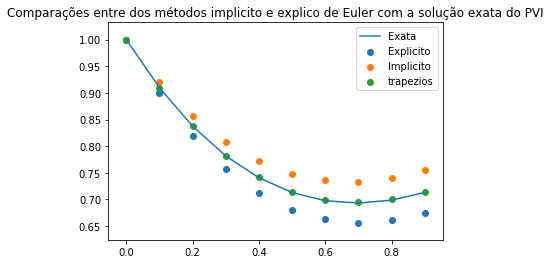

In [ ]:
plt.scatter(xe, ye, label='Explicito')
plt.scatter(xi, yi, label='Implicito')
plt.scatter(xt, yt, label='trapezios')
a = X-1+2*sympy.exp(-X)
YY = xe-1+2*np.exp(-xe)
plt.plot(xi, YY, label='Exata')
#sympy.plot(a,(X,x0,T),)
plt.title('Comparações entre dos métodos implicito e explico de Euler com a solução exata do PVI')
plt.legend();

### Método das diferênças finitas

In [ ]:
# definição do método das diferênças finitas
def MDF(u0,un,a,b,n):
    
    h    = (b-a)/n
    x    = np.arange(a,b,h)
    u    = b = np.zeros(n)
    u[0] = u0
    A          = np.zeros((n,n))
    
    A[0,0]     = 1
    A[n-1,n-1] = 1
    
    for i in range(1,n-1):
        b[i]    = -100*h**2*(x[i]-1)**2
        A[i,i-1] = 1
        A[i,i]   = -2
        A[i,i+1] = 1
        
    b[0]       = u0
    b[n-1]     = un
    A_inv = np.linalg.inv(A)
    u = np.dot(A_inv,b)
    return [x,u]

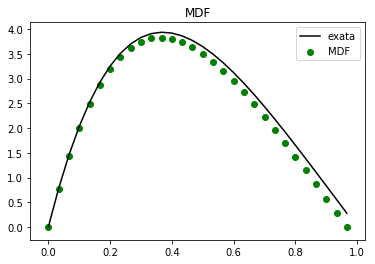

In [ ]:
[x,y] = MDF(0,0,0,1,30)
s     = (-100/12)*(x-1)**4-(100/12)*x+100/12
plt.plot(x, s, label = 'exata', color = 'black')
plt.scatter(x, y, label = 'MDF', color = 'green')
plt.legend()
plt.title('MDF');